## Task-04
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [18]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\programdata\anaconda3\lib\site-packages (from wordcloud) (3.5.1)



In [19]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [20]:
from textblob import TextBlob

In [21]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load datasets
twitter_data = pd.read_csv("C:\\Users\\vivek\\Downloads\\archive (1)\\twitter_dataset.csv")

In [23]:
twitter_data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [24]:
print(twitter_data.columns)

Index(['Tweet_ID', 'Username', 'Text', 'Retweets', 'Likes', 'Timestamp'], dtype='object')


In [25]:
text_column = 'Text'

In [26]:
twitter_data.dropna(subset=[text_column], inplace=True)

In [27]:
twitter_data[text_column] = twitter_data[text_column].str.lower()


In [28]:
twitter_data[text_column] = twitter_data[text_column].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


In [29]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [30]:
twitter_data['sentiment'] = twitter_data[text_column].apply(get_sentiment)


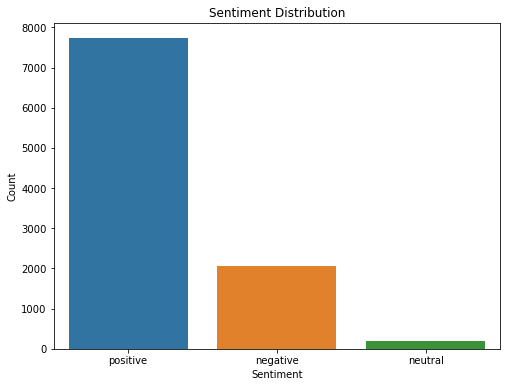

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=twitter_data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()